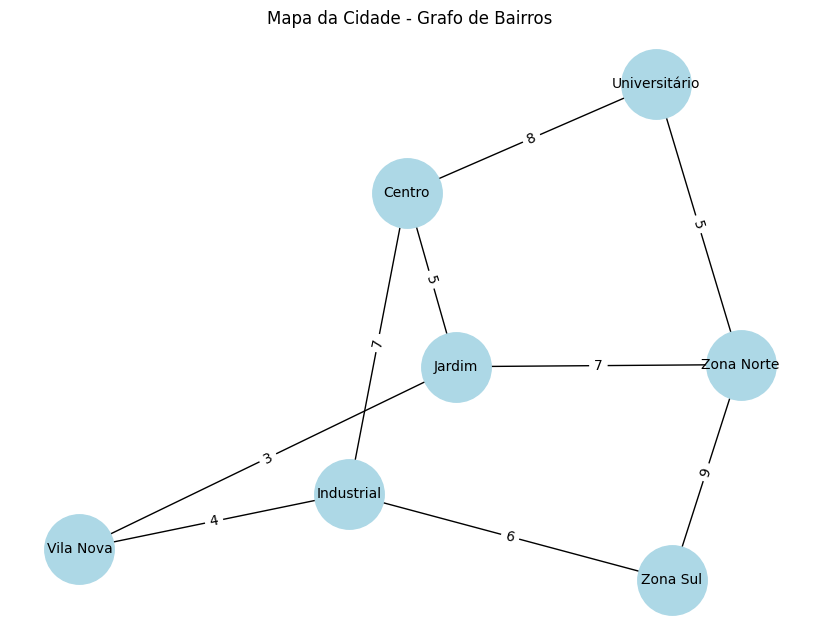

📍 Melhor rota de Centro até Zona Sul: ['Centro', 'Industrial', 'Zona Sul']
🚗 Distância total estimada: 13 km


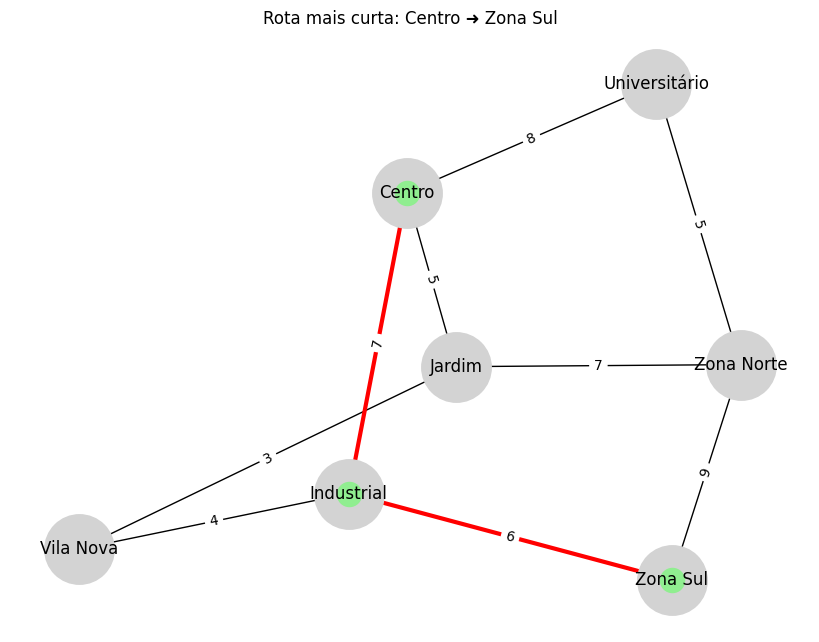

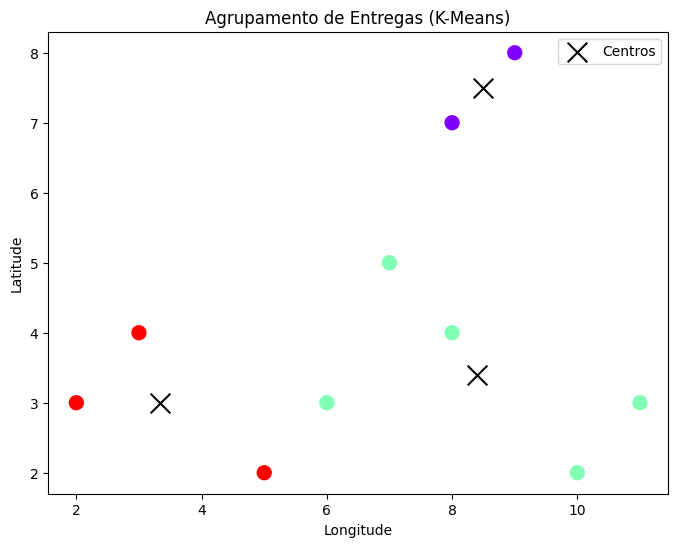

📦 Agrupamentos de entregas concluídos:
Zona 1: [[8 7]
 [9 8]]
Zona 2: [[10  2]
 [11  3]
 [ 6  3]
 [ 7  5]
 [ 8  4]]
Zona 3: [[2 3]
 [3 4]
 [5 2]]

🔍 ANÁLISE FINAL:
- O algoritmo A* encontrou a menor rota possível entre os bairros selecionados.
- O K-Means agrupou as entregas em zonas próximas, reduzindo deslocamento.
- A solução pode ser expandida para usar dados reais de GPS e trânsito em tempo real.
- Essa abordagem é semelhante à utilizada por empresas como a UPS (ORION System).


In [ ]:
# ==========================================================
# PROJETO: Rota Inteligente - Otimização de Entregas com IA
# Autor: Ryan Lima Ribeiro
# Disciplina: Artificial Intelligence Fundamentals
# ==========================================================

# ====== Importações ======
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import heapq

# ==========================================================
# ETAPA 1 - MODELAGEM DO GRAFO (MAPA DA CIDADE)
# ==========================================================
# Cada nó é um bairro e cada aresta tem um "peso" (distância em km ou tempo estimado)

G = nx.Graph()
G.add_weighted_edges_from([
    ("Centro", "Jardim", 5),
    ("Centro", "Industrial", 7),
    ("Jardim", "Vila Nova", 3),
    ("Vila Nova", "Industrial", 4),
    ("Industrial", "Zona Sul", 6),
    ("Centro", "Universitário", 8),
    ("Universitário", "Zona Norte", 5),
    ("Jardim", "Zona Norte", 7),
    ("Zona Norte", "Zona Sul", 9)
])

# Visualizando o grafo
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2500, font_size=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Mapa da Cidade - Grafo de Bairros")
plt.show()

# ==========================================================
# ETAPA 2 - ALGORITMO A* (Busca do Menor Caminho)
# ==========================================================

def a_star(graph, start, goal):
    # Heurística: distância em linha reta aproximada (simulada)
    def heuristic(a, b):
        return abs(hash(a) - hash(b)) % 10  # valor fictício para exemplo

    queue = [(0, start)]
    visited = set()
    distances = {start: 0}
    came_from = {}

    while queue:
        (cost, node) = heapq.heappop(queue)
        if node == goal:
            path = []
            while node in came_from:
                path.insert(0, node)
                node = came_from[node]
            path.insert(0, start)
            return path, distances[goal]

        if node in visited:
            continue
        visited.add(node)

        for neighbor, data in graph[node].items():
            new_cost = distances[node] + data['weight']
            if neighbor not in distances or new_cost < distances[neighbor]:
                distances[neighbor] = new_cost
                priority = new_cost + heuristic(goal, neighbor)
                heapq.heappush(queue, (priority, neighbor))
                came_from[neighbor] = node
    return None, float('inf')

# Testando o A*
origem = "Centro"
destino = "Zona Sul"
rota, distancia_total = a_star(G, origem, destino)

print(f"📍 Melhor rota de {origem} até {destino}: {rota}")
print(f"🚗 Distância total estimada: {distancia_total} km")

# Visualizando a rota no grafo
if rota:
    path_edges = list(zip(rota, rota[1:]))
    plt.figure(figsize=(8,6))
    nx.draw(G, pos, with_labels=True, node_color='lightgrey', node_size=2500)
    nx.draw_networkx_nodes(G, pos, nodelist=rota, node_color='lightgreen')
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(f"Rota mais curta: {origem} ➜ {destino}")
    plt.show()

# ==========================================================
# ETAPA 3 - AGRUPAMENTO DE ENTREGAS (K-MEANS)
# ==========================================================
# Simulando coordenadas (x, y) de locais de entrega fictícios

entregas = np.array([
    [2, 3], [3, 4], [8, 7], [9, 8],
    [10, 2], [11, 3], [5, 2], [6, 3],
    [7, 5], [8, 4]
])

# Número de entregadores / zonas
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(entregas)
labels = kmeans.labels_
centros = kmeans.cluster_centers_

# Plotando os agrupamentos
plt.figure(figsize=(8,6))
plt.scatter(entregas[:,0], entregas[:,1], c=labels, cmap='rainbow', s=100)
plt.scatter(centros[:,0], centros[:,1], c='black', marker='x', s=200, label='Centros')
plt.title("Agrupamento de Entregas (K-Means)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

print("📦 Agrupamentos de entregas concluídos:")
for i in range(k):
    print(f"Zona {i+1}: {entregas[labels == i]}")

# ==========================================================
# ETAPA 4 - ANÁLISE FINAL
# ==========================================================
print("\n🔍 ANÁLISE FINAL:")
print("- O algoritmo A* encontrou a menor rota possível entre os bairros selecionados.")
print("- O K-Means agrupou as entregas em zonas próximas, reduzindo deslocamento.")
print("- A solução pode ser expandida para usar dados reais de GPS e trânsito em tempo real.")
print("- Essa abordagem é semelhante à utilizada por empresas como a UPS (ORION System).")
